In [3]:
import pandas as pd
import numpy as np
df = pd.read_csv("Salary_Data.csv")
df = df[["company","title","totalyearlycompensation","location","yearsofexperience","yearsatcompany","basesalary"]]
df = df.dropna()
df = df.astype({"totalyearlycompensation": int,"yearsofexperience": int})
df = df.set_index(['title']).sort_index()
df

,company,totalyearlycompensation,location,yearsofexperience,yearsatcompany,basesalary
title,,,,,,
Business Analyst,Scotiabank,120000,"Toronto, ON, Canada",10,1.0,97000.0
Business Analyst,Amazon,85000,"Seattle, WA",1,0.0,73000.0
Business Analyst,Facebook,106000,"Austin, TX",4,0.0,91000.0
Business Analyst,Capital One,151000,"Washington, DC",7,1.0,135000.0
Business Analyst,amazon,77000,"Seattle, WA",2,1.0,64000.0
...,...,...,...,...,...,...
Technical Program Manager,Microsoft,259000,"Redmond, WA",15,4.0,175000.0
Technical Program Manager,Microsoft,300000,"Seattle, WA",15,9.0,191000.0
Technical Program Manager,Oracle,260000,"Seattle, WA",7,1.0,165000.0


,totalyearlycompensation
title,
Business Analyst,129727.683616
Data Scientist,203656.710628
Hardware Engineer,213655.000000
Human Resources,178711.538462
Management Consultant,162795.081967
Marketing,198971.830986
Mechanical Engineer,158442.857143
Product Designer,207637.203166
Product Manager,257813.396105


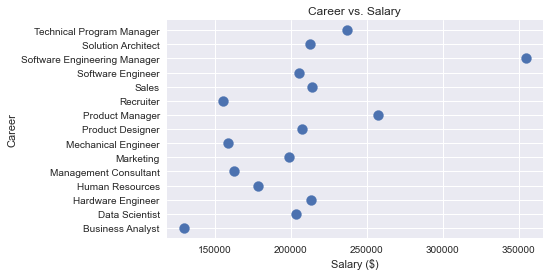

In [10]:
#Career vs Salary
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
jobsalaries = df.groupby(['title'])[["totalyearlycompensation"]].mean()
plt.scatter(jobsalaries.totalyearlycompensation, jobsalaries.index,s=100)
plt.style.use('seaborn')
plt.xlabel("Salary ($)")
plt.ylabel("Career")
plt.title("Career vs. Salary")
jobsalaries

,totalyearlycompensation
company,
Google,268461.588331
Amazon,204275.060265
Zoom,207909.090909
Tesla,215450.980392
Microsoft,186171.653927
Uber,297128.865979
Airbnb,366450.980392
Zillow,229740.000000
Dropbox,339729.411765


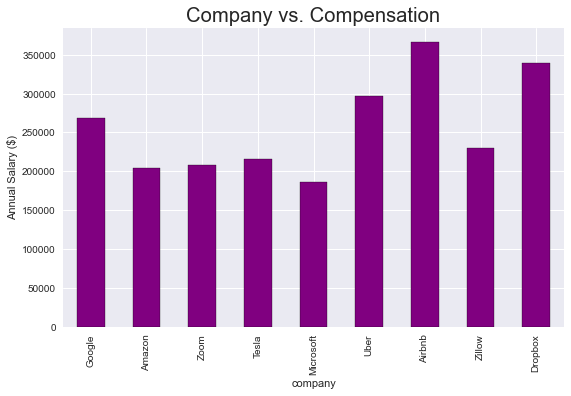

In [11]:
#Company vs compensation
companysalary = df.loc[["Software Engineer"]]
companysalary = companysalary.groupby(['company'])[["totalyearlycompensation"]].mean()
companysalary = companysalary.loc[["Google","Amazon","Zoom","Tesla","Microsoft","Uber","Airbnb","Zillow","Dropbox"]]
companysalary.plot(kind="bar",edgecolor="k",facecolor="purple")
plt.legend(labels="")
plt.style.use('fivethirtyeight')
plt.ylabel("Annual Salary ($)")
plt.title("Company vs. Compensation")
companysalary

,totalyearlycompensation
yearsofexperience,
0,143631.810081
1,139302.057550
2,158068.379492
3,174217.050582
4,187993.156653
5,202611.482776
6,222066.051661
7,220937.221728
8,235049.890591


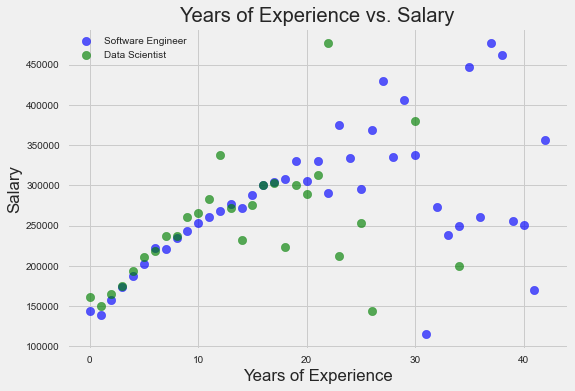

In [15]:
#Year OF Experience (Software Engineer & Data Scientist) vs salary
yoes = df.loc["Software Engineer"]
yoes = yoes.groupby(['yearsofexperience'])[["totalyearlycompensation"]].mean()
yoed = df.loc["Data Scientist"]
yoed = yoed.groupby(['yearsofexperience'])[["totalyearlycompensation"]].mean()
plt.scatter(x=yoes.index,y=yoes.totalyearlycompensation,color='b',alpha=.65,s=70)
plt.scatter(x=yoed.index,y=yoed.totalyearlycompensation,color='g',alpha=.65,s=70)
plt.style.use('fivethirtyeight')
plt.legend(["Software Engineer","Data Scientist"])
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Years of Experience vs. Salary")
yoes.head(10)

location
Atlanta, GA                   145533.333333
Austin, TX                    163472.222222
Bangalore, KA, India           69833.333333
Bellevue, WA                  211633.333333
Boston, MA                    180781.818182
Chicago, IL                   146475.000000
Cupertino, CA                 275964.912281
London, EN, United Kingdom    158488.888889
Los Angeles, CA               284897.435897
Menlo Park, CA                261127.659574
Mountain View, CA             270492.753623
New York, NY                  194755.102041
Palo Alto, CA                 256400.000000
Redmond, WA                   215628.571429
San Francisco, CA             271155.495979
San Jose, CA                  227263.888889
Seattle, WA                   233199.356913
Sunnyvale, CA                 238678.571429
Toronto, ON, Canada           118517.241379
Washington, DC                137309.523810
Name: totalyearlycompensation, dtype: float64

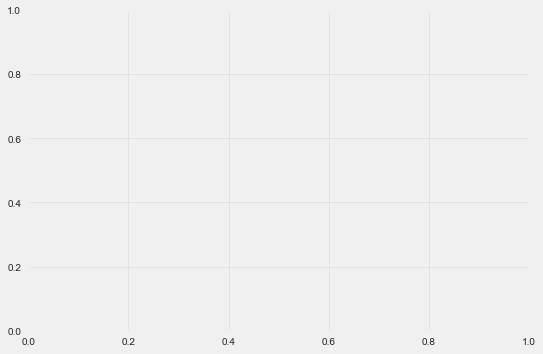

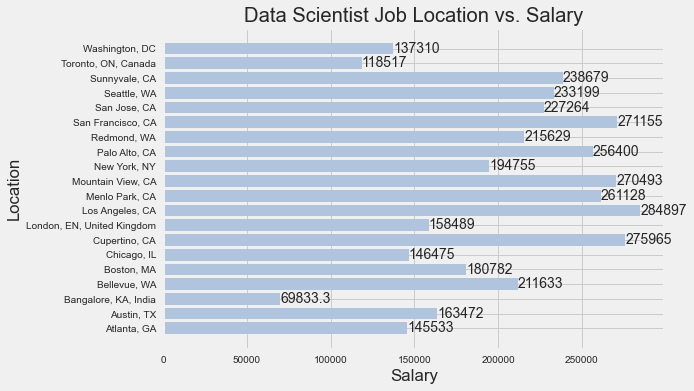

In [18]:
location = df.loc[["Data Scientist"],["location",'totalyearlycompensation']]
n=20
toplocations = location['location'].value_counts()[:n].index.tolist()
location = location.loc[location['location'].isin(toplocations)]
location = location.groupby(["location"])["totalyearlycompensation"].mean()
plt.style.use('seaborn-pastel')
plt.grid( color='grey', linewidth=0.5,alpha=0.2)
fig, ax = plt.subplots()
bars = ax.barh(location.index, location)
ax.bar_label(bars)
plt.xlabel("Salary")
plt.ylabel("Location")
plt.title("Data Scientist Job Location vs. Salary")
plt.barh(location.index,location,color='lightsteelblue')
location